In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
a_data_df = scaler.fit_transform(a_data_df)
g_data_df = scaler.fit_transform(g_data_df)

Les méthodes de mise à l'échelle peuvent être divisées en deux catégories : normalisation et standardisation.

En guise de rappel, la normalisation est une technique de mise à l'échelle dans laquelle les valeurs sont décalées et redimensionnées de manière à ce qu'elles soient comprises entre 0 et 1, tandis que la normalisation centre les valeurs autour de la moyenne avec un écart type unitaire. Cela signifie que la valeur moyenne de l'attribut devient nulle et que la distribution résultante présente un écart type unitaire.

En conséquence, les méthodes de mise à l'échelle présentées ci-dessus peuvent être classées comme suit :

    Standardisation : Standard Scaler
    Normalisation : Scaler Min-Max et Robust Scaler

La question est maintenant de savoir quand dois-je utiliser quelle technique de mise à l’échelle ? Il n’y a pas de réponse unique à cette question, mais on peut utiliser la distribution sous-jacente comme guide :

    La normalisation est utile lorsque vous savez que la distribution de vos données ne suit pas une distribution gaussienne.
    La normalisation, en revanche, peut être utile dans les cas où les données suivent une distribution gaussienne .

Ma recommandation personnelle lors du développement de modèles d'apprentissage automatique est d'adapter d'abord le modèle à des données brutes, normalisées et standardisées, puis de comparer les performances pour obtenir les meilleurs résultats. 

In [2]:
# Chargement des bibliothèques

import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
matplotlib.style.use('ggplot')


#For chapter 3.1
from sklearn.preprocessing import StandardScaler
#For chapter 3.2
from sklearn.preprocessing import MinMaxScaler
#For chapter 3.3
from sklearn.preprocessing import RobustScaler

#For chapter 5
import pickle as pk

#For chapter 6
from sklearn.model_selection import train_test_split


pd.set_option('float_format', '{:f}'.format)

## 3 méthodes de mise à l'échelle 

Le Scaler standard suppose que les données sont normalement distribuées au sein de chaque entité et les mettra à l'échelle de telle sorte que la distribution soit désormais centrée autour de 0, avec un écart type de 1.

In [3]:
np.random.seed(1)

df = pd.DataFrame({
    'Col_1': np.random.normal(0, 2, 30000),
    'Col_2': np.random.normal(5, 3, 30000),
    'Col_3': np.random.normal(-5, 5, 30000)
})

df.head()

,Col_1,Col_2,Col_3
0,3.248691,6.158165,3.702313
1,-1.223513,3.502543,0.381228
2,-1.056344,8.859463,-0.195733
3,-2.145937,3.943360,-8.099449
4,1.730815,11.728704,-10.434062


## Standard Scaler

In [1]:
col_names = df.columns
features = df[col_names]

scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_features = pd.DataFrame(features, columns = col_names)
scaled_features.head()

NameError: name 'df' is not defined

In [5]:
scaled_features.describe()

,Col_1,Col_2,Col_3
count,30000.000000,30000.000000,30000.000000
mean,0.000000,-0.000000,0.000000
std,1.000017,1.000017,1.000017
min,-4.240174,-4.079611,-4.349633
25%,-0.675720,-0.675050,-0.672894
50%,0.001141,0.004150,0.001112
75%,0.665745,0.676721,0.667188
max,4.171969,3.600454,4.021416


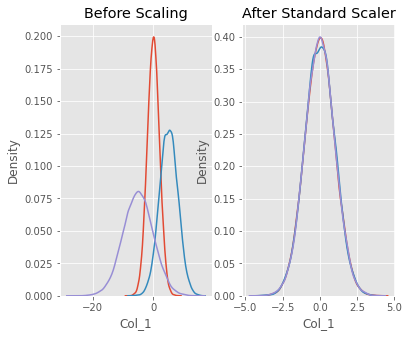

In [6]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 5))

ax1.set_title('Before Scaling')
sns.kdeplot(df['Col_1'], ax=ax1)
sns.kdeplot(df['Col_2'], ax=ax1)
sns.kdeplot(df['Col_3'], ax=ax1)
ax2.set_title('After Standard Scaler')
sns.kdeplot(scaled_features['Col_1'], ax=ax2)
sns.kdeplot(scaled_features['Col_2'], ax=ax2)
sns.kdeplot(scaled_features['Col_3'], ax=ax2)
plt.show()

## Scaler Min-Max

Le Min-Max Scaler est probablement l'algorithme de mise à l'échelle le plus célèbre et suit la formule suivante pour chaque fonctionnalité

Cela réduit essentiellement la plage de telle sorte qu'elle se situe désormais entre 0 et 1. Ce scaler fonctionne mieux dans les cas où le scaler standard pourrait ne pas fonctionner aussi bien. Si la distribution n'est pas gaussienne ou si l'écart type est très petit, le Min-Max Scaler fonctionne mieux. Cependant, il est sensible aux valeurs aberrantes, donc s'il y a des valeurs aberrantes dans les données, vous souhaiterez peut-être envisager le Robust Scaler (illustré ci-dessous)

In [7]:
np.random.seed(1)

df = pd.DataFrame({
    # positive skew
    'Col_1': np.random.chisquare(8, 1000),
    # negative skew 
    'Col_2': np.random.beta(8, 2, 1000) * 40,
    # no skew
    'Col_3': np.random.normal(50, 3, 1000)
})

df.head()

,Col_1,Col_2,Col_3
0,15.478894,34.220632,45.374083
1,5.231125,36.175631,54.239890
2,5.490867,38.350733,49.059671
3,3.943899,31.077656,56.007109
4,16.250516,36.881047,48.839375


In [8]:
col_names = df.columns
features = df[col_names]

scaler = MinMaxScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_features = pd.DataFrame(features, columns = col_names)
scaled_features.head()

,Col_1,Col_2,Col_3
0,0.421720,0.810756,0.362694
1,0.123349,0.876248,0.787307
2,0.130912,0.949114,0.539209
3,0.085871,0.705466,0.871945
4,0.444186,0.899880,0.528658


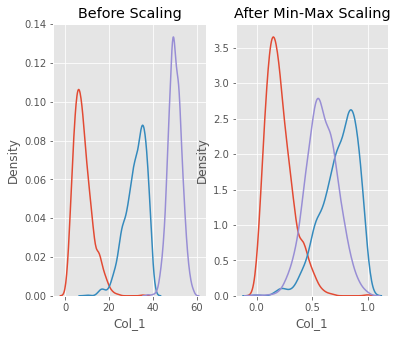

In [9]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 5))

ax1.set_title('Before Scaling')
sns.kdeplot(df['Col_1'], ax=ax1)
sns.kdeplot(df['Col_2'], ax=ax1)
sns.kdeplot(df['Col_3'], ax=ax1)
ax2.set_title('After Min-Max Scaling')
sns.kdeplot(scaled_features['Col_1'], ax=ax2)
sns.kdeplot(scaled_features['Col_2'], ax=ax2)
sns.kdeplot(scaled_features['Col_3'], ax=ax2)
plt.show()

## Robust Scaler

Le RobustScaler utilise une méthode similaire au Min-Max Scaler, mais il utilise à la place la plage interquartile, plutôt que le Min-Max, de sorte qu'il est robuste aux valeurs aberrantes

Bien sûr, cela signifie qu'il utilise moins de données pour la mise à l'échelle, il est donc plus approprié lorsqu'il y a des valeurs aberrantes dans les données.

In [10]:
np.random.seed(1)

df = pd.DataFrame({
    # Distribution with lower outliers
    'Col_1': np.concatenate([np.random.normal(20, 1, 1000), np.random.normal(1, 1, 25)]),
    # Distribution with higher outliers
    'Col_2': np.concatenate([np.random.normal(30, 1, 1000), np.random.normal(50, 1, 25)]),
})

df.head()

,Col_1,Col_2
0,21.624345,31.427547
1,19.388244,30.036197
2,19.471828,32.029997
3,18.927031,29.365595
4,20.865408,29.474897


In [11]:
col_names = df.columns
features = df[col_names]

scaler = RobustScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_features = pd.DataFrame(features, columns = col_names)
scaled_features.head()

,Col_1,Col_2
0,1.210631,0.944714
1,-0.464762,-0.027013
2,-0.402136,1.365469
3,-0.810324,-0.495366
4,0.641999,-0.419030


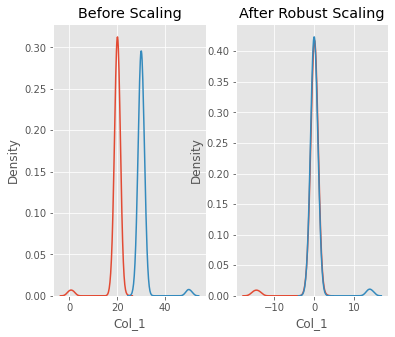

In [12]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 5))

ax1.set_title('Before Scaling')
sns.kdeplot(df['Col_1'], ax=ax1)
sns.kdeplot(df['Col_2'], ax=ax1)

ax2.set_title('After Robust Scaling')
sns.kdeplot(scaled_features['Col_1'], ax=ax2)
sns.kdeplot(scaled_features['Col_2'], ax=ax2)

plt.show()

## 

## Comparaison des méthodes de mise à l'échelle présentées précédemment 

In [13]:
np.random.seed(32)

df = pd.DataFrame({
    # Distribution with lower outliers
    'Col_1': np.concatenate([np.random.normal(20, 1, 1000), np.random.normal(1, 1, 25)]),
    # Distribution with higher outliers
    'Col_2': np.concatenate([np.random.normal(30, 1, 1000), np.random.normal(50, 1, 25)]),
})

df.head()

,Col_1,Col_2
0,19.651106,30.871754
1,20.983703,29.439243
2,20.580923,30.737413
3,20.070284,28.553760
4,20.777533,29.602207


In [14]:
col_names = df.columns
features = df[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
standard_scaler = pd.DataFrame(features, columns = col_names)


col_names = df.columns
features = df[col_names]
scaler = MinMaxScaler().fit(features.values)
features = scaler.transform(features.values)
min_max_scaler = pd.DataFrame(features, columns = col_names)


col_names = df.columns
features = df[col_names]
scaler = RobustScaler().fit(features.values)
features = scaler.transform(features.values)
robust_scaler = pd.DataFrame(features, columns = col_names)

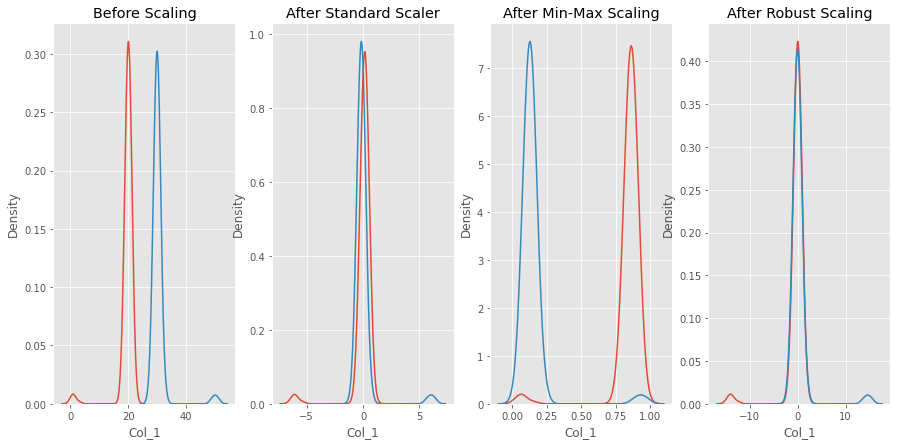

In [15]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(15, 7))

ax1.set_title('Before Scaling')
sns.kdeplot(df['Col_1'], ax=ax1)
sns.kdeplot(df['Col_2'], ax=ax1)

ax2.set_title('After Standard Scaler')
sns.kdeplot(standard_scaler['Col_1'], ax=ax2)
sns.kdeplot(standard_scaler['Col_2'], ax=ax2)

ax3.set_title('After Min-Max Scaling')
sns.kdeplot(min_max_scaler['Col_1'], ax=ax3)
sns.kdeplot(min_max_scaler['Col_2'], ax=ax3)

ax4.set_title('After Robust Scaling')
sns.kdeplot(robust_scaler['Col_1'], ax=ax4)
sns.kdeplot(robust_scaler['Col_2'], ax=ax4)

plt.show()



## Inverse Transformation

Comme déjà introduit dans l'article sur les « encodeurs » , il existe également la fonction inverse_transform pour les méthodes de mise à l'échelle. La fonctionnalité et la procédure sont très similaires.

Prenons ce dataframe comme exemple : 

In [16]:
df = pd.DataFrame({'Col_1': [1,7,2,4,8],
                   'Col_2': [7,1,5,3,4],
                   'Col_3': [3,8,0,3,9],
                   'Col_4': [4,7,9,1,4]})
df

,Col_1,Col_2,Col_3,Col_4
0,1,7,3,4
1,7,1,8,7
2,2,5,0,9
3,4,3,3,1
4,8,4,9,4


Nous appliquons maintenant le scaler standard comme indiqué précédemment :

In [17]:
col_names = df.columns
features = df[col_names]

scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_features = pd.DataFrame(features, columns = col_names)
scaled_features.head()

,Col_1,Col_2,Col_3,Col_4
0,-1.246500,1.500000,-0.473050,-0.362738
1,0.953206,-1.500000,1.005231,0.725476
2,-0.879883,0.500000,-1.360019,1.450953
3,-0.146647,-0.500000,-0.473050,-1.450953
4,1.319824,0.000000,1.300887,-0.362738


Le fit scaler a mémorisé les métriques avec lesquelles il a effectué la transformation. Il est donc relativement facile d’effectuer la transformation inverse avec la fonction inverse_transform. 

In [18]:
col_names = df.columns

re_scaled_features = scaler.inverse_transform(scaled_features)
re_scaled_df = pd.DataFrame(re_scaled_features, columns = col_names)
re_scaled_df

,Col_1,Col_2,Col_3,Col_4
0,1.000000,7.000000,3.000000,4.000000
1,7.000000,1.000000,8.000000,7.000000
2,2.000000,5.000000,0.000000,9.000000
3,4.000000,3.000000,3.000000,1.000000
4,8.000000,4.000000,9.000000,4.000000


## Exporter Scaler pour l'utiliser dans un autre programme

Il est extrêmement important de sauvegarder séparément le scaler utilisé afin de pouvoir le réutiliser pour de nouvelles prédictions. Si vous avez mis à l'échelle les données d'entraînement avec lesquelles l'algorithme a été créé, vous devez également le faire pour les prédictions de nouvelles observations. Afin de le faire avec les bonnes métriques, nous utilisons le scaler installé à l'origine. 

In [19]:
pk.dump(scaler, open('scaler.pkl', 'wb'))

Maintenant, nous rechargeons le scaler qui vient d'être enregistré (scaler.pkl)

In [20]:
scaler_reload = pk.load(open("scaler.pkl",'rb'))

Nous allons maintenant utiliser la même trame de données que précédemment pour voir que le scaler rechargé fonctionne correctement. 

In [21]:
df_new = pd.DataFrame({'Col_1': [1,7,2,4,8],
                   'Col_2': [7,1,5,3,4],
                   'Col_3': [3,8,0,3,9],
                   'Col_4': [4,7,9,1,4]})
df_new

,Col_1,Col_2,Col_3,Col_4
0,1,7,3,4
1,7,1,8,7
2,2,5,0,9
3,4,3,3,1
4,8,4,9,4


In [22]:
col_names2 = df_new.columns
features2 = df_new[col_names]


features2 = scaler_reload.transform(features2.values)
scaled_features2 = pd.DataFrame(features2, columns = col_names2)
scaled_features2.head()

,Col_1,Col_2,Col_3,Col_4
0,-1.246500,1.500000,-0.473050,-0.362738
1,0.953206,-1.500000,1.005231,0.725476
2,-0.879883,0.500000,-1.360019,1.450953
3,-0.146647,-0.500000,-0.473050,-1.450953
4,1.319824,0.000000,1.300887,-0.362738


## Mise à l'échelle des fonctionnalités en pratique 

Dans la pratique, l'ensemble des données n'est généralement pas mis à l'échelle. Il y a deux raisons à cela :

    Dans le cas d'ensembles de données volumineux, il n'est pas judicieux, en termes de capacité de stockage (RAM), de réserver un autre ensemble de données mis à l'échelle.

    Pour former des algorithmes d’apprentissage automatique supervisé, les ensembles de données sont généralement divisés en parties de formation et de test. Il est courant de mettre à l'échelle uniquement la partie formation . Les métriques utilisées pour mettre à l'échelle la partie formation sont ensuite appliquées à la partie test . Cela devrait éviter que la partie test destinée à évaluer un algorithme ne soit vraiment invisible.

Cela semble compliqué, mais c'est totalement simple à mettre en œuvre.

Tout d’abord, nous créons une trame de données aléatoire. 

In [23]:
df = pd.DataFrame(np.random.randint(0,100,size=(10000, 4)), columns=['Var1', 'Var2', 'Var3', 'Target_Var'])
df.head()

,Var1,Var2,Var3,Target_Var
0,65,56,81,99
1,40,67,51,58
2,99,13,17,41
3,50,96,39,63
4,79,78,11,76


Ensuite, nous l'avons divisé comme si nous voulions former un modèle d'apprentissage automatique

In [24]:
x = df.drop('Target_Var', axis=1)
y = df['Target_Var']

trainX, testX, trainY, testY = train_test_split(x, y, test_size = 0.2)

Maintenant, la mise à l'échelle est utilisée (ici StandardScaler) : 

In [25]:
sc=StandardScaler()

scaler = sc.fit(trainX)
trainX_scaled = scaler.transform(trainX)
testX_scaled = scaler.transform(testX)

Nous sauvegardons le scaler sur un objet, adaptons cet objet à la partie formation et transformons la partie trainX et testX avec les métriques obtenues. Nous avons ici les fonctionnalités mises à l'échelle : 

In [26]:
trainX_scaled

array([[-1.05249398,  0.95383853, -1.12942174],
       [-1.40205814,  1.36848896,  0.29647859],
       [-0.91266832,  0.19364607, -0.12085809],
       ...,
       [ 0.55550114,  0.85017592,  1.16593001],
       [ 0.48558831,  0.91928432, -1.26853397],
       [ 0.38071906,  1.16116374, -0.39908255]])

Vous pouvez également vous épargner une étape dans la syntaxe si vous n'utilisez pas la fonction fit & transform individuellement mais ensemble !! Ne faites pas cela si vous envisagez de former un algorithme d'apprentissage automatique !! Utilisez la méthode précédente pour cela.

Mais si vous souhaitez mettre à l'échelle un ensemble de données complet (par exemple pour une analyse de cluster), utilisez la fonction fit_transform : 

In [27]:
sc=StandardScaler()

df_scaled = sc.fit_transform(df)

## Normaliser ou standardiser ?

Les méthodes de mise à l'échelle peuvent être divisées en deux catégories : normalisation et standardisation.

En guise de rappel, la normalisation est une technique de mise à l'échelle dans laquelle les valeurs sont décalées et redimensionnées de manière à ce qu'elles soient comprises entre 0 et 1, tandis que la normalisation centre les valeurs autour de la moyenne avec un écart type unitaire. Cela signifie que la valeur moyenne de l'attribut devient nulle et que la distribution résultante présente un écart type unitaire.

En conséquence, les méthodes de mise à l'échelle présentées ci-dessus peuvent être classées comme suit : 


  -  Standardization: Standard Scaler
-  Normalization: Min-Max Scaler & Robust Scaler


La question est maintenant de savoir quand dois-je utiliser quelle technique de mise à l’échelle ? Il n’y a pas de réponse unique à cette question, mais on peut utiliser la distribution sous-jacente comme guide :

    La normalisation est utile lorsque vous savez que la distribution de vos données ne suit pas une distribution gaussienne.
    La normalisation, en revanche, peut être utile dans les cas où les données suivent une distribution gaussienne .

Ma recommandation personnelle lors du développement de modèles d'apprentissage automatique est d'adapter d'abord le modèle à des données brutes, normalisées et standardisées, puis de comparer les performances pour obtenir les meilleurs résultats. 